In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

## Load and display data

In [2]:
loaded_data = np.genfromtxt("../../data/3992_good.dat", skip_header = 1, delimiter = ',')
Pid = 3992
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

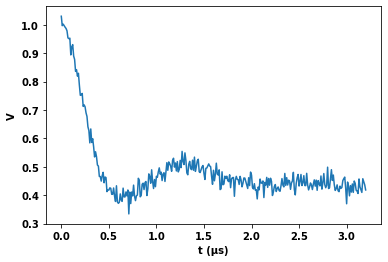

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


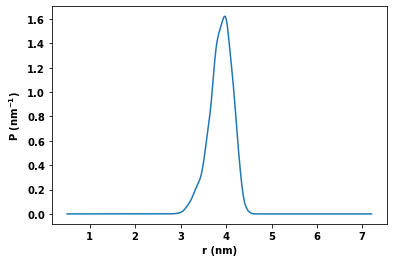

In [3]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## Higher r res resolution

In [ ]:
pars = {"method": 'regularization', "r": np.linspace(2,6,400)}

model_high_r = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 4}
trace_high_r = dive.sample(model_high_r,MCMCparameters)

In [ ]:
dive.summary(trace_high_r, model_high_r, Pid = Pid)  

## Initial Regularization

In [20]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 1}
trace = dive.sample(model,MCMCparameters)

Sequential sampling (4 chains in 1 job)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


V01.0 delta10000.0 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.0 delta10701.128350330026 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.0 delta13853.80917378409 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.000089556456966 delta18485.016607887588 k0.24820105869155779 lamb0.39394526061422575 sigma0.2615336646214996
V00.9846855269315161 delta25076.704841717547 k0.2433700910148461 lamb0.3909061591475221 sigma0.1990844663758706
V00.9846855269315161 delta22748.380171610155 k0.2433700910148461 lamb0.3909061591475221 sigma0.1990844663758706
V00.9715029036667471 delta26199.966965327247 k0.24337447819540078 lamb0.3951716973682899 sigma0.19164905893364279
V01.031228698655049 delta36999.206758871114 k0.21678137850315882 lamb0.3938800210849145 sigma0.15583603274761457
V00.9580201553146078 delta35734.68546335209 k0.1547463583329814 lamb0.3960137985248357 sigma0.05256399235762413
V00.9392986086455481 delta29360.17742708789 k0.1459615940608721 lamb0.40018216774793103 si

V01.0 delta10000.0 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.0 delta13036.7857419193 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.0 delta10982.181250484884 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.0202639195135732 delta10571.46707485506 k0.2390466826634814 lamb0.4068138432373095 sigma0.2912898825226574
V01.0012828574548973 delta12881.095166628564 k0.21282315768084364 lamb0.3754741077254176 sigma0.08947560854640119
V01.0012828574548973 delta13072.196977837131 k0.21282315768084364 lamb0.3754741077254176 sigma0.08947560854640119
V00.9469415813495028 delta13362.107974325561 k0.18626760474575257 lamb0.3710715485211372 sigma0.07449527323613907
V00.9503663277505991 delta12093.306321191538 k0.18515511566650156 lamb0.37172640455466366 sigma0.07311892468214233
V00.9558292646611318 delta11274.311973979155 k0.18230320127077473 lamb0.37112194799487686 sigma0.07257730519920481
V00.9509820288611184 delta10662.502714692328 k0.18097145229417722 lamb0.378753952141

V01.0 delta10000.0 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.0 delta11155.359537239985 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.0 delta13754.55280980016 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V00.9549391588426344 delta13669.487795206976 k0.2472800986181094 lamb0.3838922051101443 sigma0.26284884171072925
V01.0063656241394563 delta15894.316944841028 k0.22630420645342075 lamb0.37238999187503935 sigma0.2054036550219483
V00.9968541046591527 delta20078.42022183183 k0.20695894429279013 lamb0.3762189166213054 sigma0.1264718153855135
V00.9968541046591527 delta22751.631510454583 k0.20695894429279013 lamb0.3762189166213054 sigma0.1264718153855135
V00.9954573963902406 delta21950.50513825899 k0.2077677342194976 lamb0.37770102256447685 sigma0.12312760972258283
V00.9776864190178564 delta23379.59991898105 k0.18230649580275732 lamb0.3803509403543311 sigma0.1066231214158879
V00.9697669167253831 delta28149.41163033291 k0.14999264683409202 lamb0.41406151765929944 

V01.0 delta10000.0 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.0 delta9404.810128675625 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.0 delta10116.893885207906 k0.25 lamb0.393939393939394 sigma0.3499999999999999
V01.0325751906582974 delta12419.793468517639 k0.2463636669131434 lamb0.3650021962192179 sigma0.2809970852542471
V01.0142924147551795 delta8111.834853360978 k0.203277897610323 lamb0.39365789037266036 sigma0.09870435680637843
V01.0142924147551795 delta6510.432891537879 k0.203277897610323 lamb0.39365789037266036 sigma0.09870435680637843
V00.9785471541112437 delta6743.399438649829 k0.1971571727844676 lamb0.394572106901483 sigma0.08807723779641675
V00.9855738648298431 delta8574.535728766277 k0.1963502653913062 lamb0.3947593306276799 sigma0.0874409609094837
V00.9761973704197294 delta7108.109013814047 k0.1964846009686338 lamb0.39436641243464177 sigma0.08831433693298572
V00.9918471367670969 delta7568.289178078664 k0.1875481370421763 lamb0.39640433312616585 sigma0.

Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 4120 seconds.
There were 865 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5211319209945433, but should be close to 0.8. Try to increase the number of tuning steps.
There were 879 divergences after tuning. Increase `target_accept` or reparameterize.
There were 879 divergences after tuning. Increase `target_accept` or reparameterize.
There were 892 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.041,0.007,0.027,0.055,0.000,0.000,1000.0,1544.0,1.01
λ,0.519,0.010,0.501,0.537,0.000,0.000,982.0,2023.0,1.00
V₀,0.995,0.015,0.967,1.022,0.000,0.000,1167.0,2014.0,1.00
σ,0.039,0.009,0.026,0.055,0.000,0.000,391.0,635.0,1.02
δ,9523.893,4881.145,1813.981,18664.487,228.735,161.844,388.0,635.0,1.01
lg(α),0.545,0.055,0.482,0.634,0.004,0.003,493.0,56.0,1.03


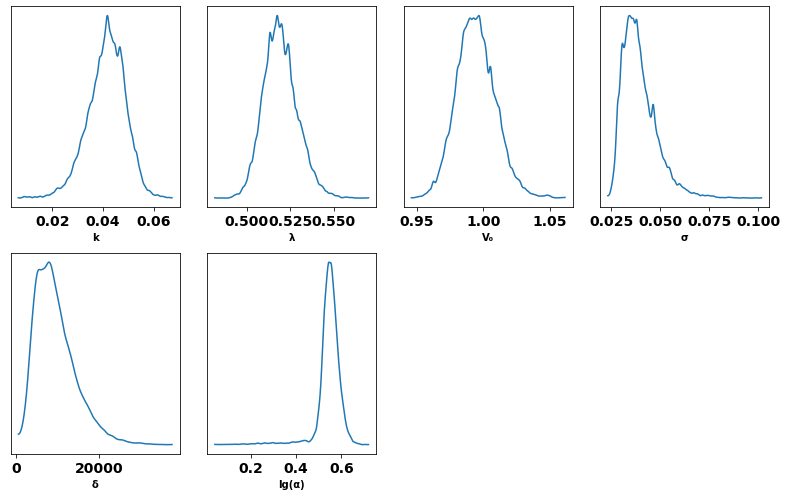

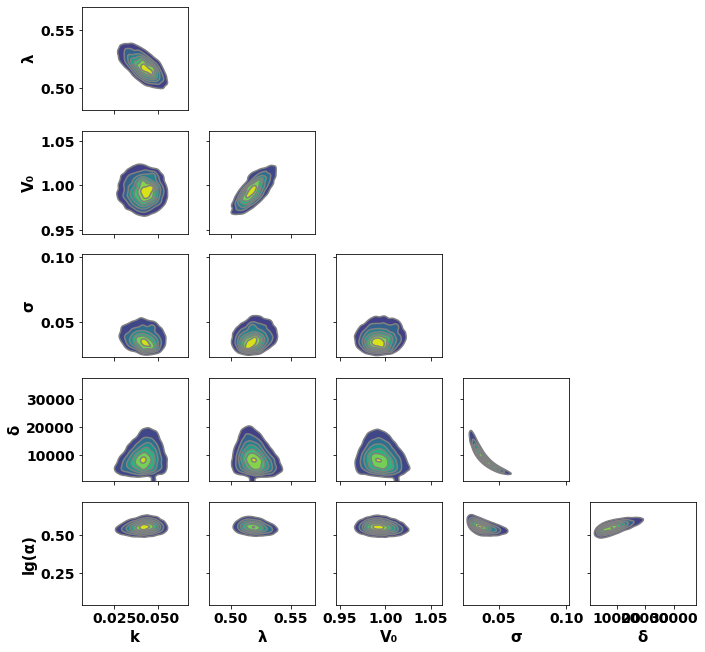

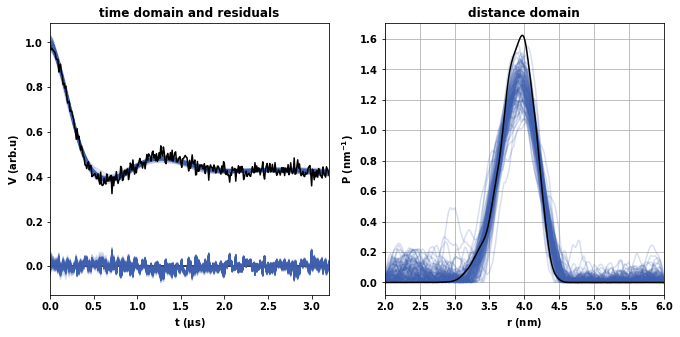

In [22]:
dive.summary(trace, model, Pid = Pid)  

## Single Gaussian

In [13]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 1}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, V0, lamb, k, w, r0_rel]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 303 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\data\io_pymc3.py:329: UserWarning: Could not compute log_likelihood, it will be omitted. Check your model object or set log_likelihood=False
  warnings.warn(warn_msg)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
r0[0],3.918,0.010,3.900,3.938,0.0,0.0,14526.0,14031.0,1.0
w[0],0.589,0.026,0.543,0.639,0.0,0.0,14063.0,13272.0,1.0
k,0.050,0.003,0.044,0.055,0.0,0.0,12802.0,12983.0,1.0
λ,0.499,0.004,0.492,0.506,0.0,0.0,10265.0,11255.0,1.0
V₀,0.970,0.005,0.959,0.980,0.0,0.0,11862.0,13082.0,1.0
σ,0.020,0.001,0.019,0.022,0.0,0.0,16342.0,14029.0,1.0


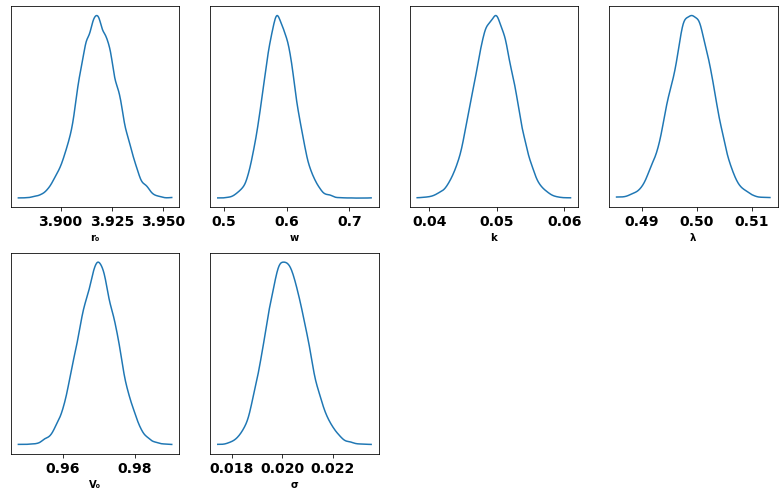

C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\data\io_pymc3.py:329: UserWarning: Could not compute log_likelihood, it will be omitted. Check your model object or set log_likelihood=False
  warnings.warn(warn_msg)


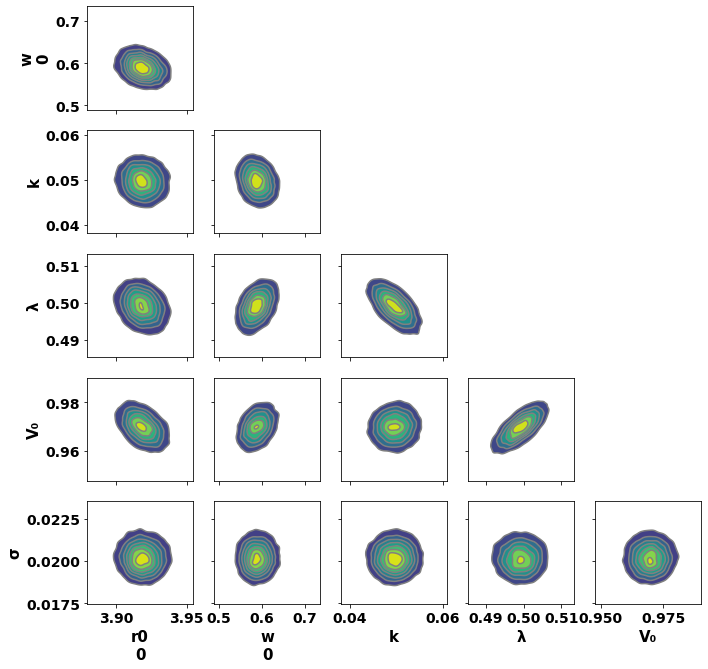

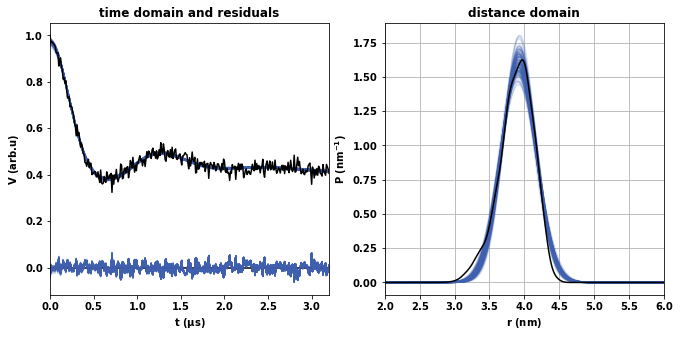

In [21]:
dive.summary(trace_gauss, model_gauss, Pid = Pid)  